In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [16]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory) # To reset wd to default one

Current Working Directory: /Users/samuele/Documents/Università/Magistrale/Corsi/HPC/FHPC_Assignment/Exercise2/THIN/size


## Analysis of results with double precision

In [17]:
methods = ['mkl', 'oblas', 'blis']
precision = ['float', 'double']
placement = ['close', 'spread']

In [18]:
df = pd.DataFrame(columns=['Size', 'Time', 'GFLOPS', 'precision', 'method', 'placement'])
df

,Size,Time,GFLOPS,precision,method,placement


In [19]:
for pl in placement:
    for m in methods:
        for prec in precision:
            file_pattern = f"{pl}/{m}_{prec}_*.csv"

            # Get a list of file paths matching the pattern
            file_paths = glob.glob(file_pattern)

            # Initialize an empty list to store DataFrames
            dfs = []

            # Loop through each file and read it into a DataFrame, then add it to the list
            for file_path in file_paths:
                df_temp = pd.read_csv(file_path)
                dfs.append(df_temp)

            # Concatenate all DataFrames in the list into a single DataFrame
            df_temp = pd.concat(dfs, ignore_index=True)
            df_temp['precision'] = prec
            df_temp['method'] = m
            df_temp['placement'] = pl

            # Display the combined DataFrame
            df = pd.concat([df, df_temp])

In [20]:
df

,Size,Time,GFLOPS,precision,method,placement
0,17000,6.023784,1631.200622,float,mkl,close
1,17000,6.021049,1631.941646,float,mkl,close
2,17000,6.021160,1631.911584,float,mkl,close
3,17000,6.022807,1631.465208,float,mkl,close
4,17000,6.021088,1631.930878,float,mkl,close
...,...,...,...,...,...,...
90,11000,6.469227,411.486548,double,blis,spread
91,11000,6.498823,409.612661,double,blis,spread
92,11000,6.473967,411.185272,double,blis,spread
93,11000,6.507017,409.096804,double,blis,spread


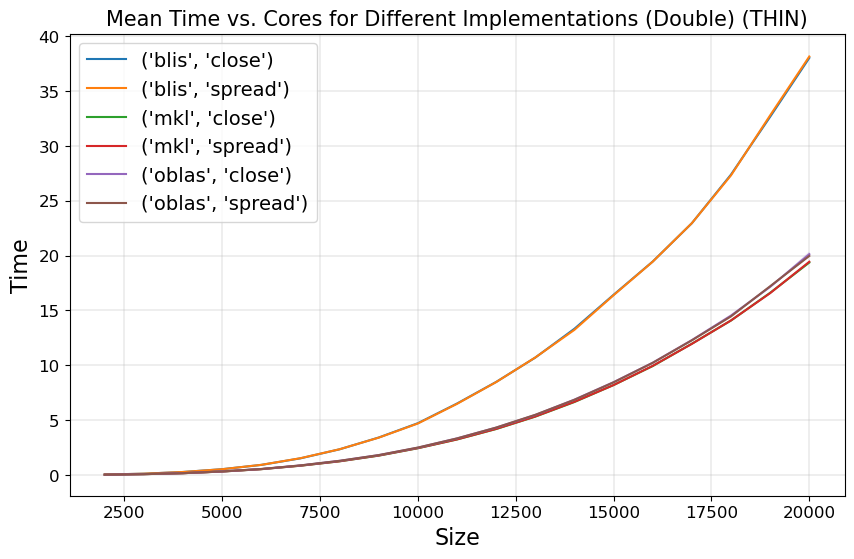

In [21]:
grouped_double = df[df['precision']=='double']
grouped_double.drop(columns=['precision'])

grouped_double = grouped_double.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_double['Time'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)

# Add labels and legend
plt.xlabel('Size', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Mean Time vs. Cores for Different Implementations (Double) (THIN)', fontsize = 15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()


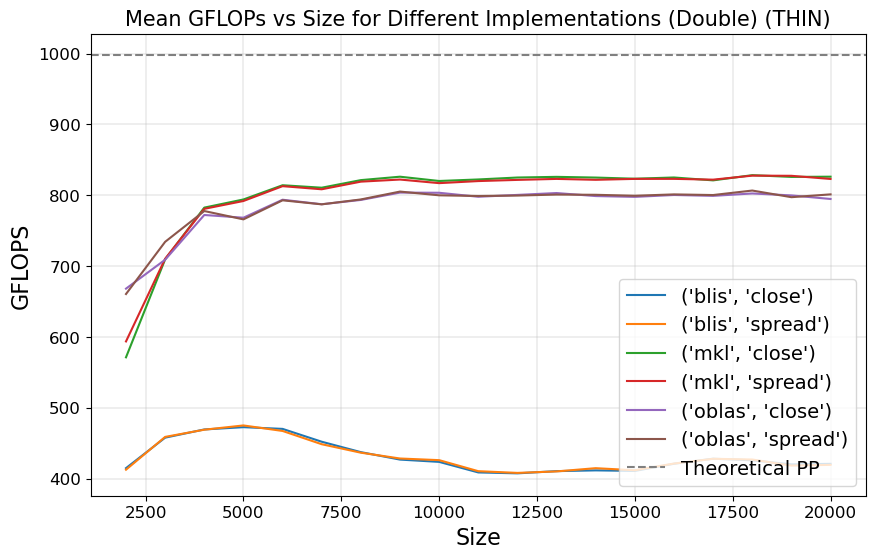

In [22]:
grouped_double = df[df['precision']=='double']
grouped_double.drop(columns=['precision'])

grouped_double = grouped_double.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_double['GFLOPS'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0)


# Add labels and legend
plt.xlabel('Size', fontsize = 16)
plt.ylabel('GFLOPS', fontsize = 16)
plt.title('Mean GFLOPs vs Size for Different Implementations (Double) (THIN)', fontsize = 15)

plt.axhline(y = 83.2*12, color = 'gray', label = "Theoretical PP", linestyle='dashed')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()


- - - 


## Analysis of results with float precision

In [23]:
df

,Size,Time,GFLOPS,precision,method,placement
0,17000,6.023784,1631.200622,float,mkl,close
1,17000,6.021049,1631.941646,float,mkl,close
2,17000,6.021160,1631.911584,float,mkl,close
3,17000,6.022807,1631.465208,float,mkl,close
4,17000,6.021088,1631.930878,float,mkl,close
...,...,...,...,...,...,...
90,11000,6.469227,411.486548,double,blis,spread
91,11000,6.498823,409.612661,double,blis,spread
92,11000,6.473967,411.185272,double,blis,spread
93,11000,6.507017,409.096804,double,blis,spread


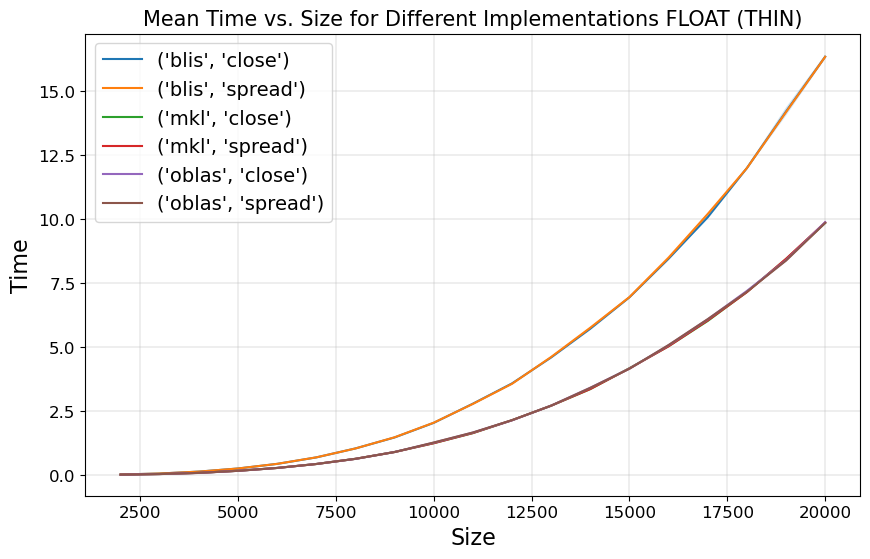

In [24]:
grouped_float = df[df['precision']=='float']
grouped_float.drop(columns=['precision'])

grouped_float = grouped_float.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_float['Time'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0.2)

plt.xlabel('Size', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Mean Time vs. Size for Different Implementations FLOAT (THIN)', fontsize = 15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()

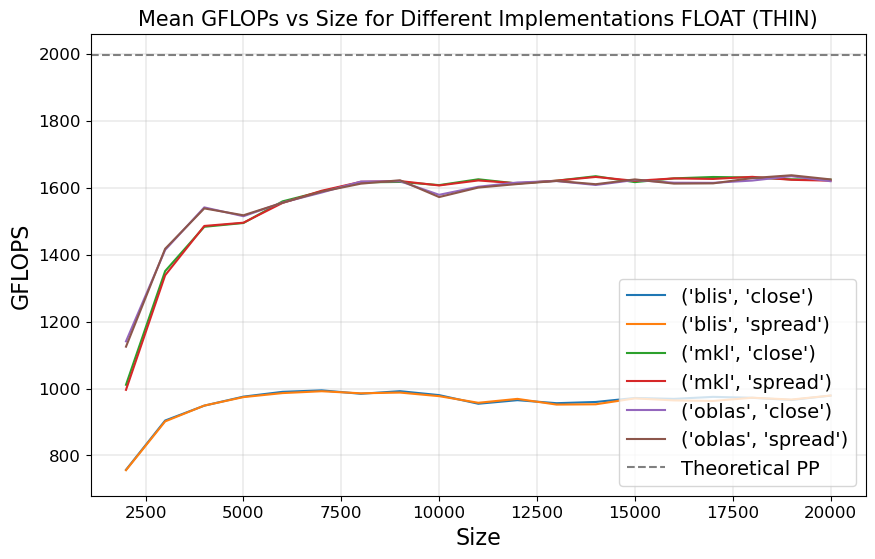

In [25]:
grouped_float = df[df['precision']=='float']
grouped_float.drop(columns=['precision'])

grouped_float = grouped_float.groupby(['method', 'placement', 'Size'])


# Calculate the mean, minimum, and maximum of 'Time' for each group
agg_df = grouped_float['GFLOPS'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 6))
for name, group in agg_df.groupby(['method', 'placement']):
    plt.plot(group['Size'], group['mean'], label=name)
    plt.fill_between(group['Size'],
                     group['mean'] - group['std'],
                     group['mean'] + group['std'],
                     alpha=0)

plt.xlabel('Size', fontsize = 16)
plt.ylabel('GFLOPS', fontsize = 16)
plt.title('Mean GFLOPs vs Size for Different Implementations FLOAT (THIN)', fontsize = 15)
plt.axhline(y = 83.2*12*2, color = 'gray', label = "Theoretical PP", linestyle='dashed')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14)

# Show the plot
plt.grid(linewidth = 0.3)
plt.show()